In [2]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 300
min_pair_overs = 60  # 1/5th of min_overs

In [4]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/odiout.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
print(qbovercnt)
len(bovercnt)

                  over
bowler                
AD Mathews         446
AG Cremer          327
AU Rashid          456
Abdur Razzak       581
B Kumar            492
B Lee              439
BAW Mendis         326
CH Gayle           351
CR Woakes          413
DJ Bravo           537
DJG Sammy          438
DL Vettori         590
DW Steyn           513
Dawlat Zadran      301
E Chigumbura       306
GH Dockrell        340
GP Swann           334
Harbhajan Singh    589
I Sharma           412
IK Pathan          384
Imran Tahir        459
J Botha            327
JDP Oram           320
JE Taylor          362
JH Kallis          304
JJ Bumrah          354
JM Anderson        702
JO Holder          519
Junaid Khan        323
K Rabada           339
KAJ Roach          350
KD Mills           500
KJ O'Brien         307
KMDN Kulasekara    628
LE Plunkett        352
M Morkel           466
M Muralitharan     362
M Ntini            331
MA Starc           340
MG Johnson         513
MM Ali             452
MN Samuels 

1148

In [3]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/odipair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,0,1,Z Khan,2,0,2,P Kumar
1,2,0,3,Z Khan,2,0,4,P Kumar
2,1,0,5,Z Khan,2,0,6,P Kumar
3,2,0,7,Z Khan,9,0,8,P Kumar
4,5,0,9,Z Khan,8,0,10,P Kumar
...,...,...,...,...,...,...,...,...
46915,1,0,39,Kuldeep Yadav,7,0,40,YS Chahal
46916,4,0,41,Kuldeep Yadav,1,0,42,B Kumar
46917,11,0,43,YS Chahal,4,0,44,B Kumar
46918,4,0,45,YS Chahal,3,0,46,JJ Bumrah


In [4]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())
pairdf

bowler1         bowler2      
A Beggs         GH Lewis         4
                L Maritz         3
                SM Kavanagh      2
A Bohara        KD Mills         1
                P Khadka         1
                                ..
Ziaur Rahman    Mahmudullah      6
                Mominul Haque    6
                Rubel Hossain    2
Zulfiqar Babar  Anwar Ali        5
                Shahid Afridi    1
Length: 18272, dtype: int64

In [5]:
#names = og_data['bowler'].unique()
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

len(Bpartners)

80

In [6]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1
print(paircnt)

AD Mathews NLTC Perera 61
AD Mathews KMDN Kulasekara 61
AU Rashid MM Ali 167
AU Rashid LE Plunkett 72
Abdur Razzak Shakib Al Hasan 130
Abdur Razzak Mahmudullah 68
B Kumar JJ Bumrah 121
B Kumar Mohammed Shami 95
B Lee NW Bracken 78
CH Gayle DJ Bravo 64
DJ Bravo DJG Sammy 67
DL Vettori SB Styris 87
DL Vettori JDP Oram 66
DW Steyn M Morkel 71
Dawlat Zadran Mujeeb Ur Rahman 65
Harbhajan Singh Yuvraj Singh 93
JM Anderson TT Bresnan 86
JM Anderson SCJ Broad 166
JM Anderson ST Finn 63
JO Holder SS Cottrell 63
KD Mills TG Southee 84
KMDN Kulasekara SL Malinga 166
M Muralitharan ST Jayasuriya 61
M Ntini SM Pollock 158
MG Johnson SR Watson 64
Mahmudullah Shakib Al Hasan 89
Mashrafe Mortaza Syed Rasel 74
Mashrafe Mortaza Shakib Al Hasan 95
Mashrafe Mortaza Shahadat Hossain 60
Mashrafe Mortaza Mustafizur Rahman 67
Mohammad Hafeez Shahid Afridi 178
Mohammad Hafeez Saeed Ajmal 73
Mohammad Nabi Rashid Khan 101
P Utseya RW Price 70
R Ashwin RA Jadeja 198
Rubel Hossain Shakib Al Hasan 66
SC Williams Si

In [7]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))
print(Bpartner_qualified)

#Bpartner_qualified.keys()

53
{'AD Mathews': ['NLTC Perera', 'KMDN Kulasekara'], 'AU Rashid': ['MM Ali', 'LE Plunkett'], 'Abdur Razzak': ['Shakib Al Hasan', 'Mahmudullah'], 'B Kumar': ['JJ Bumrah', 'Mohammed Shami'], 'B Lee': ['NW Bracken'], 'CH Gayle': ['DJ Bravo'], 'DJ Bravo': ['CH Gayle', 'DJG Sammy'], 'DJG Sammy': ['DJ Bravo'], 'DL Vettori': ['SB Styris', 'JDP Oram'], 'DW Steyn': ['M Morkel'], 'Dawlat Zadran': ['Mujeeb Ur Rahman'], 'Harbhajan Singh': ['Yuvraj Singh'], 'JDP Oram': ['DL Vettori'], 'JJ Bumrah': ['B Kumar'], 'JM Anderson': ['TT Bresnan', 'SCJ Broad', 'ST Finn'], 'JO Holder': ['SS Cottrell'], 'KD Mills': ['TG Southee'], 'KMDN Kulasekara': ['AD Mathews', 'SL Malinga'], 'LE Plunkett': ['AU Rashid'], 'M Morkel': ['DW Steyn'], 'M Muralitharan': ['ST Jayasuriya'], 'M Ntini': ['SM Pollock'], 'MA Starc': ['JR Hazlewood'], 'MG Johnson': ['SR Watson'], 'MM Ali': ['AU Rashid'], 'Mahmudullah': ['Abdur Razzak', 'Shakib Al Hasan'], 'Mashrafe Mortaza': ['Syed Rasel', 'Shakib Al Hasan', 'Shahadat Hossain', 'Mus

In [8]:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]
        break
dfpairba

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
5777,5,0,8,MM Patel,4,0,9,Z Khan
6286,13,0,2,MM Patel,1,1,3,Z Khan
6287,6,0,4,MM Patel,9,0,5,Z Khan
6288,2,0,6,MM Patel,5,0,7,Z Khan
6995,7,1,45,MM Patel,6,1,46,Z Khan
6996,5,0,47,MM Patel,4,0,48,Z Khan
12278,0,0,10,MM Patel,6,0,11,Z Khan
12279,4,0,12,MM Patel,9,0,13,Z Khan
12295,11,0,44,MM Patel,3,1,45,Z Khan
12296,6,0,46,MM Patel,2,1,47,Z Khan


AD Mathews NLTC Perera


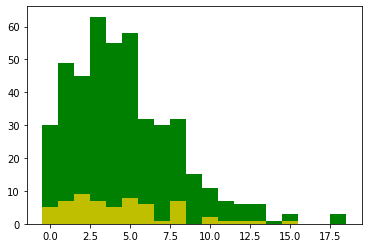

Bowler's Economy  :  4.665919282511211
Bowlership's Economy  :  4.524590163934426


Bowler's Skew     :  1.0110385867571288
Bowlership's Skew :  0.018195514816008253
Bowler's Kurtosis     :  1.3202787179586695
Bowlership's Kurtosis :  -1.608151790622225


Greater : Statistics=196.00, p=0.00 
Two-Sided : Statistics=196.00, p=0.00 
Less : Statistics=196.00, p=1.00 

AD Mathews - NLTC Perera better than AD Mathews
____________________________________________


AD Mathews KMDN Kulasekara


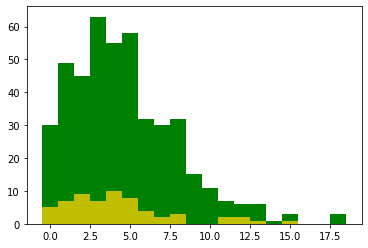

Bowler's Economy  :  4.665919282511211
Bowlership's Economy  :  4.295081967213115


Bowler's Skew     :  1.0110385867571288
Bowlership's Skew :  0.341914887681854
Bowler's Kurtosis     :  1.3202787179586695
Bowlership's Kurtosis :  -1.3491232910057194


Greater : Statistics=180.00, p=0.00 
Two-Sided : Statistics=180.00, p=0.00 
Less : Statistics=180.00, p=1.00 

AD Mathews - KMDN Kulasekara better than AD Mathews
____________________________________________


AU Rashid MM Ali


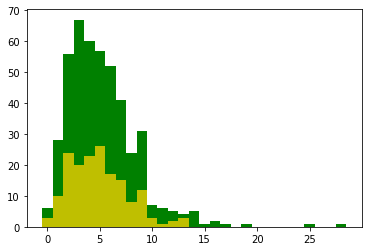

Bowler's Economy  :  5.241228070175438
Bowlership's Economy  :  4.92814371257485


Bowler's Skew     :  1.8267739763939974
Bowlership's Skew :  0.23334728165921062
Bowler's Kurtosis     :  7.060467327633118
Bowlership's Kurtosis :  -1.4070709050595869


Greater : Statistics=158.50, p=0.36 
Two-Sided : Statistics=158.50, p=0.71 
Less : Statistics=158.50, p=0.66 

____________________________________________


AU Rashid LE Plunkett


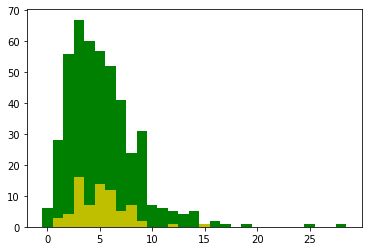

Bowler's Economy  :  5.241228070175438
Bowlership's Economy  :  5.069444444444445


Bowler's Skew     :  1.8267739763939974
Bowlership's Skew :  0.6572227104049408
Bowler's Kurtosis     :  7.060467327633118
Bowlership's Kurtosis :  -0.9486987514089895


Greater : Statistics=141.00, p=0.16 
Two-Sided : Statistics=141.00, p=0.32 
Less : Statistics=141.00, p=0.85 

____________________________________________


Abdur Razzak Shakib Al Hasan


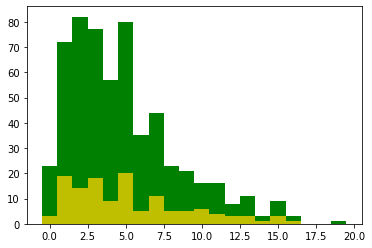

Bowler's Economy  :  4.827882960413081
Bowlership's Economy  :  5.253846153846154


Bowler's Skew     :  1.055120602195069
Bowlership's Skew :  0.9018017852943253
Bowler's Kurtosis     :  0.8101451770783199
Bowlership's Kurtosis :  -0.6443619970940753


Greater : Statistics=242.00, p=0.00 
Two-Sided : Statistics=242.00, p=0.00 
Less : Statistics=242.00, p=1.00 

____________________________________________


Abdur Razzak Mahmudullah


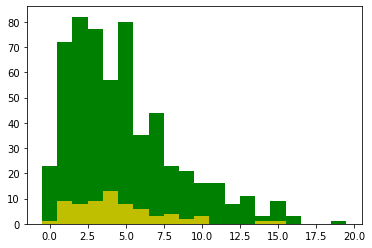

Bowler's Economy  :  4.827882960413081
Bowlership's Economy  :  4.5588235294117645


Bowler's Skew     :  1.055120602195069
Bowlership's Skew :  0.4974072924019988
Bowler's Kurtosis     :  0.8101451770783199
Bowlership's Kurtosis :  -0.8858941280620627


Greater : Statistics=199.50, p=0.00 
Two-Sided : Statistics=199.50, p=0.00 
Less : Statistics=199.50, p=1.00 

Abdur Razzak - Mahmudullah better than Abdur Razzak
____________________________________________


B Kumar JJ Bumrah


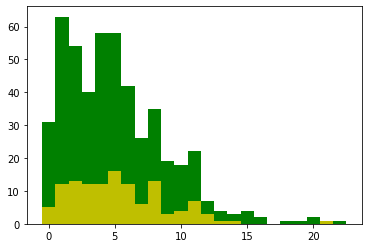

Bowler's Economy  :  5.1016260162601625
Bowlership's Economy  :  5.355371900826446


Bowler's Skew     :  1.1102915107897142
Bowlership's Skew :  0.08333519138973158
Bowler's Kurtosis     :  1.7094212352435871
Bowlership's Kurtosis :  -1.5135737643050842


Greater : Statistics=227.50, p=0.06 
Two-Sided : Statistics=227.50, p=0.13 
Less : Statistics=227.50, p=0.94 

____________________________________________


B Kumar Mohammed Shami


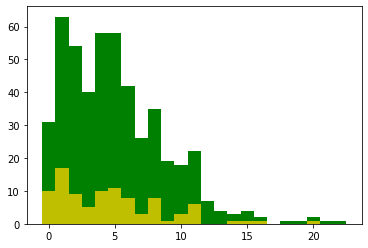

Bowler's Economy  :  5.1016260162601625
Bowlership's Economy  :  4.71578947368421


Bowler's Skew     :  1.1102915107897142
Bowlership's Skew :  0.6477991585666865
Bowler's Kurtosis     :  1.7094212352435871
Bowlership's Kurtosis :  -0.2947177709191653


Greater : Statistics=241.00, p=0.03 
Two-Sided : Statistics=241.00, p=0.05 
Less : Statistics=241.00, p=0.97 

____________________________________________


B Lee NW Bracken


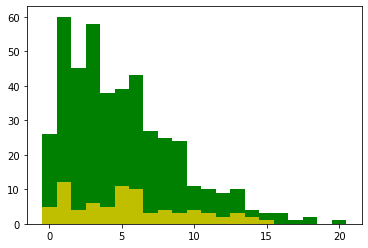

Bowler's Economy  :  5.043280182232346
Bowlership's Economy  :  5.538461538461538


Bowler's Skew     :  0.9687068539876721
Bowlership's Skew :  1.1328254955324475
Bowler's Kurtosis     :  0.7063840471418397
Bowlership's Kurtosis :  0.03683235242701466


Greater : Statistics=236.00, p=0.01 
Two-Sided : Statistics=236.00, p=0.02 
Less : Statistics=236.00, p=0.99 

____________________________________________


CH Gayle DJ Bravo


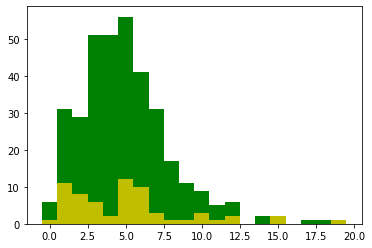

Bowler's Economy  :  4.994301994301995
Bowlership's Economy  :  5.078125


Bowler's Skew     :  1.218925861815921
Bowlership's Skew :  0.9065251402677595
Bowler's Kurtosis     :  2.6408583290671057
Bowlership's Kurtosis :  -0.7952122408005526


Greater : Statistics=197.00, p=0.01 
Two-Sided : Statistics=197.00, p=0.02 
Less : Statistics=197.00, p=0.99 

____________________________________________


DJ Bravo CH Gayle


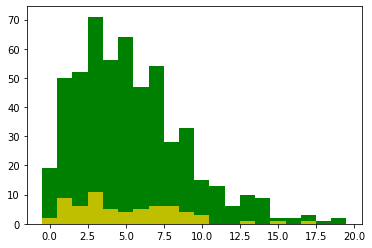

Bowler's Economy  :  5.366852886405959
Bowlership's Economy  :  5.078125


Bowler's Skew     :  0.9496024112720515
Bowlership's Skew :  0.6140167611865108
Bowler's Kurtosis     :  0.9336020489636376
Bowlership's Kurtosis :  -0.22264974022154682


Greater : Statistics=220.50, p=0.00 
Two-Sided : Statistics=220.50, p=0.01 
Less : Statistics=220.50, p=1.00 

DJ Bravo - CH Gayle better than DJ Bravo
____________________________________________


DJ Bravo DJG Sammy


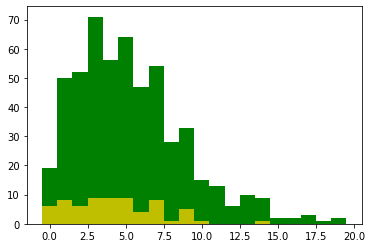

Bowler's Economy  :  5.366852886405959
Bowlership's Economy  :  4.253731343283582


Bowler's Skew     :  0.9496024112720515
Bowlership's Skew :  -0.41858142334932236
Bowler's Kurtosis     :  0.9336020489636376
Bowlership's Kurtosis :  -1.298965972685557


Greater : Statistics=186.00, p=0.01 
Two-Sided : Statistics=186.00, p=0.01 
Less : Statistics=186.00, p=1.00 

DJ Bravo - DJG Sammy better than DJ Bravo
____________________________________________


DJG Sammy DJ Bravo


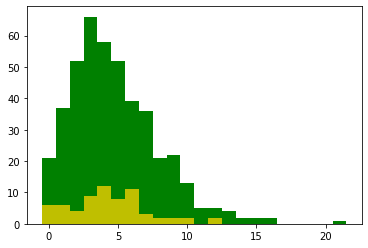

Bowler's Economy  :  4.773972602739726
Bowlership's Economy  :  4.388059701492537


Bowler's Skew     :  1.0517542532530535
Bowlership's Skew :  0.5185214690579237
Bowler's Kurtosis     :  1.7914708492390243
Bowlership's Kurtosis :  -1.1402346549991564


Greater : Statistics=155.50, p=0.02 
Two-Sided : Statistics=155.50, p=0.05 
Less : Statistics=155.50, p=0.98 

DJG Sammy - DJ Bravo better than DJG Sammy
____________________________________________


DL Vettori SB Styris


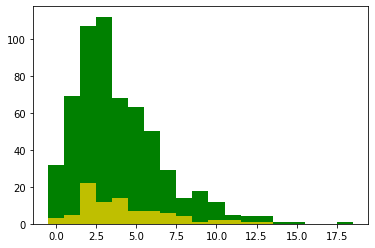

Bowler's Economy  :  3.906779661016949
Bowlership's Economy  :  4.2298850574712645


Bowler's Skew     :  1.2013613577191795
Bowlership's Skew :  1.4231393517325812
Bowler's Kurtosis     :  1.9322362434101317
Bowlership's Kurtosis :  1.2749260537542062


Greater : Statistics=174.00, p=0.01 
Two-Sided : Statistics=174.00, p=0.03 
Less : Statistics=174.00, p=0.99 

____________________________________________


DL Vettori JDP Oram


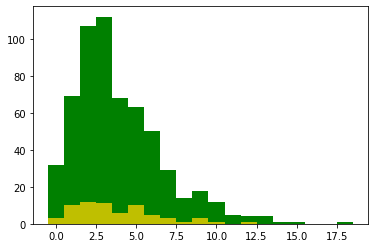

Bowler's Economy  :  3.906779661016949
Bowlership's Economy  :  3.772727272727273


Bowler's Skew     :  1.2013613577191795
Bowlership's Skew :  0.39146892028256736
Bowler's Kurtosis     :  1.9322362434101317
Bowlership's Kurtosis :  -1.4318236731187413


Greater : Statistics=154.50, p=0.01 
Two-Sided : Statistics=154.50, p=0.02 
Less : Statistics=154.50, p=0.99 

DL Vettori - JDP Oram better than DL Vettori
____________________________________________


DW Steyn M Morkel


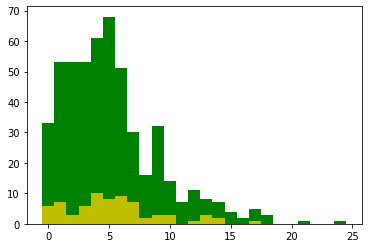

Bowler's Economy  :  5.187134502923977
Bowlership's Economy  :  5.394366197183099


Bowler's Skew     :  1.2156753852884854
Bowlership's Skew :  0.33346096214923304
Bowler's Kurtosis     :  1.8583817108750722
Bowlership's Kurtosis :  -1.2616350918996004


Greater : Statistics=241.50, p=0.00 
Two-Sided : Statistics=241.50, p=0.01 
Less : Statistics=241.50, p=1.00 

____________________________________________


Dawlat Zadran Mujeeb Ur Rahman


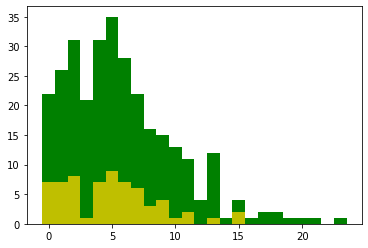

Bowler's Economy  :  5.7574750830564785
Bowlership's Economy  :  4.892307692307693


Bowler's Skew     :  1.0247375001209598
Bowlership's Skew :  -0.03574369263772835
Bowler's Kurtosis     :  1.1721550482815744
Bowlership's Kurtosis :  -1.587784918133409


Greater : Statistics=212.00, p=0.06 
Two-Sided : Statistics=212.00, p=0.11 
Less : Statistics=212.00, p=0.95 

____________________________________________


Harbhajan Singh Yuvraj Singh


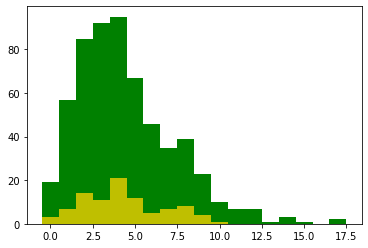

Bowler's Economy  :  4.453310696095077
Bowlership's Economy  :  4.311827956989247


Bowler's Skew     :  1.0044452144780482
Bowlership's Skew :  0.8312024975142317
Bowler's Kurtosis     :  1.2973370558248547
Bowlership's Kurtosis :  0.09811328950974918


Greater : Statistics=129.50, p=0.05 
Two-Sided : Statistics=129.50, p=0.09 
Less : Statistics=129.50, p=0.96 

____________________________________________


JDP Oram DL Vettori


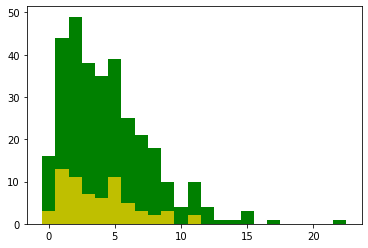

Bowler's Economy  :  4.471875
Bowlership's Economy  :  3.803030303030303


Bowler's Skew     :  1.2810354468982592
Bowlership's Skew :  0.6292853089020909
Bowler's Kurtosis     :  2.579729646998419
Bowlership's Kurtosis :  -1.1059374999999998


Greater : Statistics=128.50, p=0.10 
Two-Sided : Statistics=128.50, p=0.19 
Less : Statistics=128.50, p=0.91 

____________________________________________


JJ Bumrah B Kumar


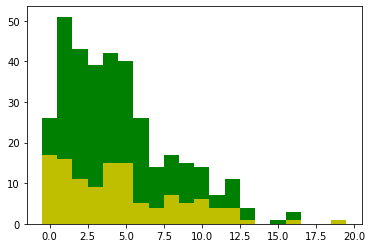

Bowler's Economy  :  4.604519774011299
Bowlership's Economy  :  4.619834710743802


Bowler's Skew     :  0.9724261975240793
Bowlership's Skew :  0.5083825597294398
Bowler's Kurtosis     :  0.671604060851287
Bowlership's Kurtosis :  -1.143677971963656


Greater : Statistics=196.00, p=0.02 
Two-Sided : Statistics=196.00, p=0.03 
Less : Statistics=196.00, p=0.99 

____________________________________________


JM Anderson TT Bresnan


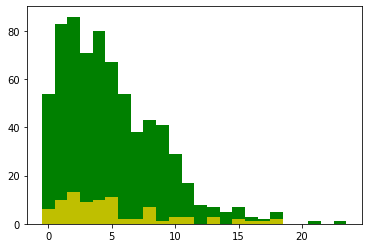

Bowler's Economy  :  4.9586894586894585
Bowlership's Economy  :  5.232558139534884


Bowler's Skew     :  1.0716982146971454
Bowlership's Skew :  0.6427458700558282
Bowler's Kurtosis     :  1.3586880405218293
Bowlership's Kurtosis :  -1.1177973922186109


Greater : Statistics=275.50, p=0.00 
Two-Sided : Statistics=275.50, p=0.00 
Less : Statistics=275.50, p=1.00 

____________________________________________


JM Anderson SCJ Broad


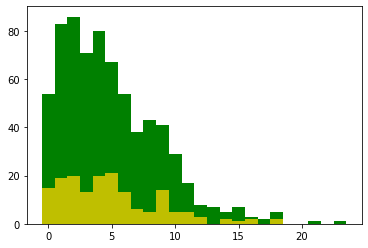

Bowler's Economy  :  4.9586894586894585
Bowlership's Economy  :  4.945783132530121


Bowler's Skew     :  1.0716982146971454
Bowlership's Skew :  0.29928202035527934
Bowler's Kurtosis     :  1.3586880405218293
Bowlership's Kurtosis :  -1.503511651389879


Greater : Statistics=248.00, p=0.02 
Two-Sided : Statistics=248.00, p=0.04 
Less : Statistics=248.00, p=0.98 

JM Anderson - SCJ Broad better than JM Anderson
____________________________________________


JM Anderson ST Finn


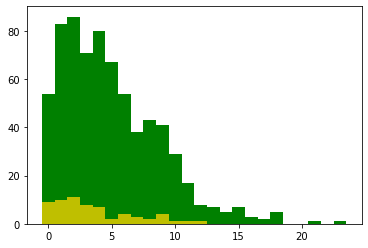

Bowler's Economy  :  4.9586894586894585
Bowlership's Economy  :  3.5555555555555554


Bowler's Skew     :  1.0716982146971454
Bowlership's Skew :  0.453619117923643
Bowler's Kurtosis     :  1.3586880405218293
Bowlership's Kurtosis :  -1.3301667298870816


Greater : Statistics=211.00, p=0.00 
Two-Sided : Statistics=211.00, p=0.01 
Less : Statistics=211.00, p=1.00 

JM Anderson - ST Finn better than JM Anderson
____________________________________________


JO Holder SS Cottrell


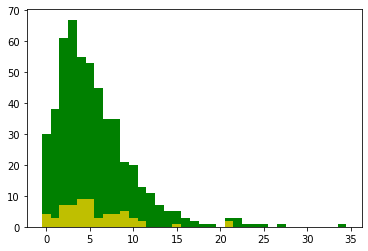

Bowler's Economy  :  5.630057803468208
Bowlership's Economy  :  5.571428571428571


Bowler's Skew     :  1.8345121859496107
Bowlership's Skew :  0.6105265516415441
Bowler's Kurtosis     :  5.457465601701189
Bowlership's Kurtosis :  -0.8131732840874113


Greater : Statistics=231.00, p=0.13 
Two-Sided : Statistics=231.00, p=0.25 
Less : Statistics=231.00, p=0.88 

____________________________________________


KD Mills TG Southee


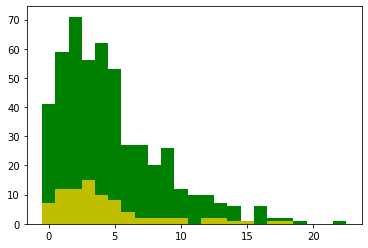

Bowler's Economy  :  4.748
Bowlership's Economy  :  4.369047619047619


Bowler's Skew     :  1.2258478223314155
Bowlership's Skew :  0.9184832694759986
Bowler's Kurtosis     :  1.492062225601769
Bowlership's Kurtosis :  -0.6550191385925013


Greater : Statistics=265.50, p=0.01 
Two-Sided : Statistics=265.50, p=0.01 
Less : Statistics=265.50, p=1.00 

KD Mills - TG Southee better than KD Mills
____________________________________________


KMDN Kulasekara AD Mathews


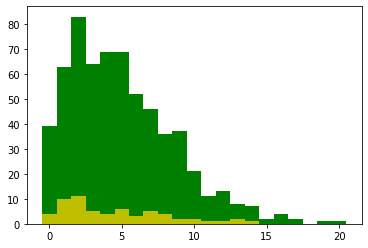

Bowler's Economy  :  5.020700636942675
Bowlership's Economy  :  4.573770491803279


Bowler's Skew     :  0.9077279605780182
Bowlership's Skew :  1.1291763160457744
Bowler's Kurtosis     :  0.7544421266592085
Bowlership's Kurtosis :  0.4010125227620591


Greater : Statistics=241.00, p=0.00 
Two-Sided : Statistics=241.00, p=0.00 
Less : Statistics=241.00, p=1.00 

KMDN Kulasekara - AD Mathews better than KMDN Kulasekara
____________________________________________


KMDN Kulasekara SL Malinga


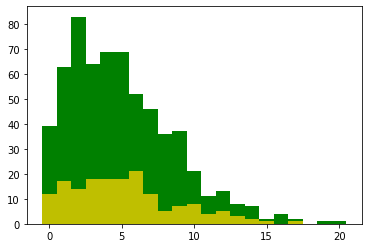

Bowler's Economy  :  5.020700636942675
Bowlership's Economy  :  5.162650602409639


Bowler's Skew     :  0.9077279605780182
Bowlership's Skew :  0.1995279327433778
Bowler's Kurtosis     :  0.7544421266592085
Bowlership's Kurtosis :  -1.4486095325910944


Greater : Statistics=234.00, p=0.03 
Two-Sided : Statistics=234.00, p=0.05 
Less : Statistics=234.00, p=0.98 

____________________________________________


LE Plunkett AU Rashid


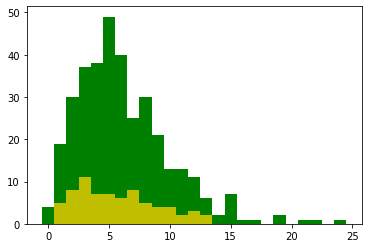

Bowler's Economy  :  6.207386363636363
Bowlership's Economy  :  5.680555555555555


Bowler's Skew     :  1.1945145648233682
Bowlership's Skew :  0.41083353689186053
Bowler's Kurtosis     :  2.2219690453862615
Bowlership's Kurtosis :  -0.4876555020653881


Greater : Statistics=178.00, p=0.12 
Two-Sided : Statistics=178.00, p=0.24 
Less : Statistics=178.00, p=0.89 

____________________________________________


M Morkel DW Steyn


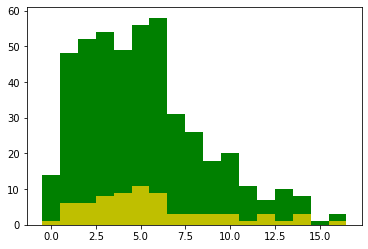

Bowler's Economy  :  5.225321888412017
Bowlership's Economy  :  5.732394366197183


Bowler's Skew     :  0.7859628572467524
Bowlership's Skew :  0.6698929917924585
Bowler's Kurtosis     :  0.19814241954435108
Bowlership's Kurtosis :  -0.8776593740080298


Greater : Statistics=240.00, p=0.00 
Two-Sided : Statistics=240.00, p=0.00 
Less : Statistics=240.00, p=1.00 

____________________________________________


M Muralitharan ST Jayasuriya


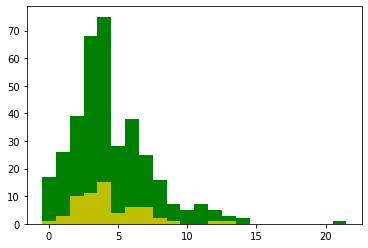

Bowler's Economy  :  4.466850828729282
Bowlership's Economy  :  4.327868852459017


Bowler's Skew     :  1.2970727422456905
Bowlership's Skew :  0.9178263541846196
Bowler's Kurtosis     :  3.1640433459313897
Bowlership's Kurtosis :  -0.3732895933789915


Greater : Statistics=152.00, p=0.00 
Two-Sided : Statistics=152.00, p=0.01 
Less : Statistics=152.00, p=1.00 

M Muralitharan - ST Jayasuriya better than M Muralitharan
____________________________________________


M Ntini SM Pollock


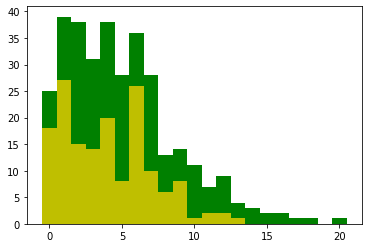

Bowler's Economy  :  4.978851963746224
Bowlership's Economy  :  4.012658227848101


Bowler's Skew     :  0.9657108001095487
Bowlership's Skew :  0.4572280285192063
Bowler's Kurtosis     :  0.893321279534617
Bowlership's Kurtosis :  -1.0077368341618167


Greater : Statistics=163.50, p=0.21 
Two-Sided : Statistics=163.50, p=0.42 
Less : Statistics=163.50, p=0.80 

____________________________________________


MA Starc JR Hazlewood


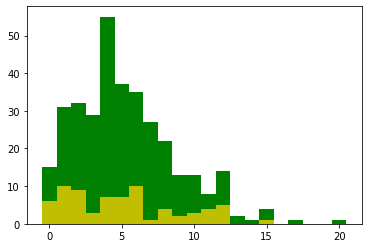

Bowler's Economy  :  5.3
Bowlership's Economy  :  5.083333333333333


Bowler's Skew     :  0.8320028530302256
Bowlership's Skew :  0.276287454838211
Bowler's Kurtosis     :  0.7486743681056294
Bowlership's Kurtosis :  -1.1475826446281


Greater : Statistics=190.50, p=0.01 
Two-Sided : Statistics=190.50, p=0.01 
Less : Statistics=190.50, p=0.99 

MA Starc - JR Hazlewood better than MA Starc
____________________________________________


MG Johnson SR Watson


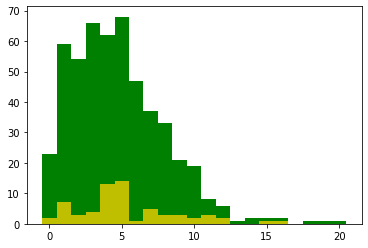

Bowler's Economy  :  4.7894736842105265
Bowlership's Economy  :  5.421875


Bowler's Skew     :  1.0374623657557176
Bowlership's Skew :  1.5920548442385765
Bowler's Kurtosis     :  1.8075469724240154
Bowlership's Kurtosis :  1.224196422749733


Greater : Statistics=209.50, p=0.02 
Two-Sided : Statistics=209.50, p=0.05 
Less : Statistics=209.50, p=0.98 

____________________________________________


MM Ali AU Rashid


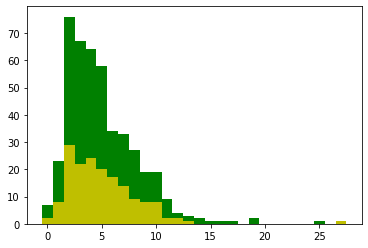

Bowler's Economy  :  5.057522123893805
Bowlership's Economy  :  5.017964071856287


Bowler's Skew     :  1.8508751942437238
Bowlership's Skew :  0.5102143119828672
Bowler's Kurtosis     :  6.67669892779344
Bowlership's Kurtosis :  -1.035253077704139


Greater : Statistics=174.50, p=0.30 
Two-Sided : Statistics=174.50, p=0.59 
Less : Statistics=174.50, p=0.71 

____________________________________________


Mahmudullah Abdur Razzak


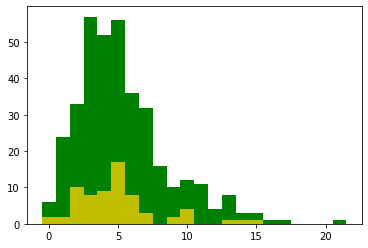

Bowler's Economy  :  5.30327868852459
Bowlership's Economy  :  4.9411764705882355


Bowler's Skew     :  1.1816082801376322
Bowlership's Skew :  1.135174750891198
Bowler's Kurtosis     :  1.8034893983631877
Bowlership's Kurtosis :  0.480619055750656


Greater : Statistics=180.50, p=0.01 
Two-Sided : Statistics=180.50, p=0.03 
Less : Statistics=180.50, p=0.99 

Mahmudullah - Abdur Razzak better than Mahmudullah
____________________________________________


Mahmudullah Shakib Al Hasan


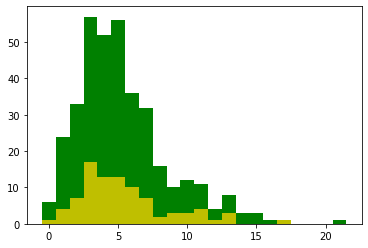

Bowler's Economy  :  5.30327868852459
Bowlership's Economy  :  5.393258426966292


Bowler's Skew     :  1.1816082801376322
Bowlership's Skew :  0.9072160561082353
Bowler's Kurtosis     :  1.8034893983631877
Bowlership's Kurtosis :  -0.4344318560335907


Greater : Statistics=198.00, p=0.03 
Two-Sided : Statistics=198.00, p=0.06 
Less : Statistics=198.00, p=0.97 

____________________________________________


Mashrafe Mortaza Syed Rasel


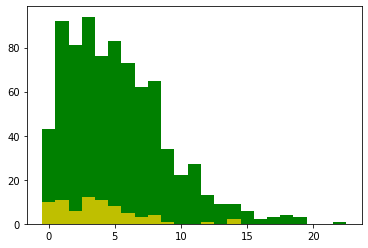

Bowler's Economy  :  5.228179551122195
Bowlership's Economy  :  3.7162162162162162


Bowler's Skew     :  0.9824863606959063
Bowlership's Skew :  0.13023297680704546
Bowler's Kurtosis     :  1.1255348403647476
Bowlership's Kurtosis :  -1.4935164980386724


Greater : Statistics=193.50, p=0.01 
Two-Sided : Statistics=193.50, p=0.01 
Less : Statistics=193.50, p=0.99 

Mashrafe Mortaza - Syed Rasel better than Mashrafe Mortaza
____________________________________________


Mashrafe Mortaza Shakib Al Hasan


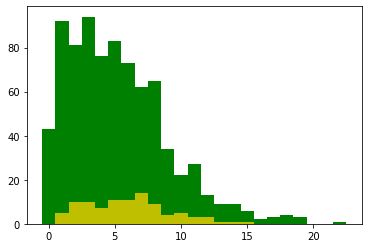

Bowler's Economy  :  5.228179551122195
Bowlership's Economy  :  6.010526315789473


Bowler's Skew     :  0.9824863606959063
Bowlership's Skew :  0.2162240784282402
Bowler's Kurtosis     :  1.1255348403647476
Bowlership's Kurtosis :  -1.241031855955679


Greater : Statistics=239.00, p=0.00 
Two-Sided : Statistics=239.00, p=0.01 
Less : Statistics=239.00, p=1.00 

____________________________________________


Mashrafe Mortaza Shahadat Hossain


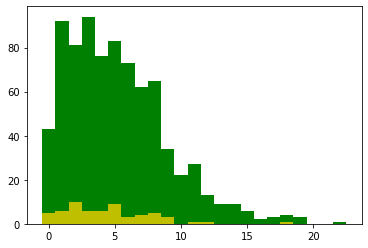

Bowler's Economy  :  5.228179551122195
Bowlership's Economy  :  4.45


Bowler's Skew     :  0.9824863606959063
Bowlership's Skew :  0.3585098811645481
Bowler's Kurtosis     :  1.1255348403647476
Bowlership's Kurtosis :  -0.685539716831912


Greater : Statistics=219.50, p=0.00 
Two-Sided : Statistics=219.50, p=0.00 
Less : Statistics=219.50, p=1.00 

Mashrafe Mortaza - Shahadat Hossain better than Mashrafe Mortaza
____________________________________________


Mashrafe Mortaza Mustafizur Rahman


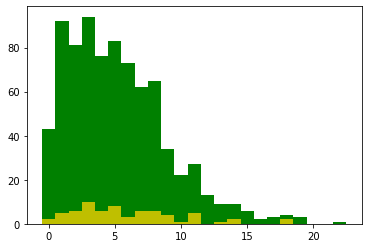

Bowler's Economy  :  5.228179551122195
Bowlership's Economy  :  5.925373134328358


Bowler's Skew     :  0.9824863606959063
Bowlership's Skew :  0.38741678094195187
Bowler's Kurtosis     :  1.1255348403647476
Bowlership's Kurtosis :  -0.6127456545732368


Greater : Statistics=256.00, p=0.00 
Two-Sided : Statistics=256.00, p=0.00 
Less : Statistics=256.00, p=1.00 

____________________________________________


Mohammad Hafeez Shahid Afridi


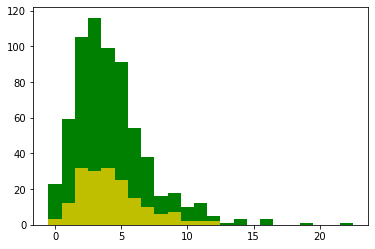

Bowler's Economy  :  4.250381679389313
Bowlership's Economy  :  4.247191011235955


Bowler's Skew     :  1.5380095975502277
Bowlership's Skew :  0.5721987370304884
Bowler's Kurtosis     :  4.305333213567596
Bowlership's Kurtosis :  -1.2828072353268463


Greater : Statistics=143.00, p=0.15 
Two-Sided : Statistics=143.00, p=0.31 
Less : Statistics=143.00, p=0.86 

____________________________________________


Mohammad Hafeez Saeed Ajmal


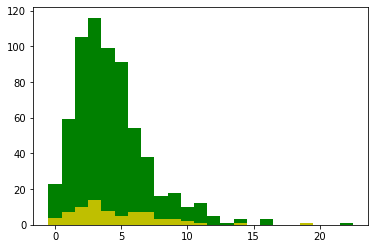

Bowler's Economy  :  4.250381679389313
Bowlership's Economy  :  4.5479452054794525


Bowler's Skew     :  1.5380095975502277
Bowlership's Skew :  0.7646463851121876
Bowler's Kurtosis     :  4.305333213567596
Bowlership's Kurtosis :  -0.09541895210713269


Greater : Statistics=187.50, p=0.01 
Two-Sided : Statistics=187.50, p=0.02 
Less : Statistics=187.50, p=0.99 

____________________________________________


Mohammad Nabi Rashid Khan


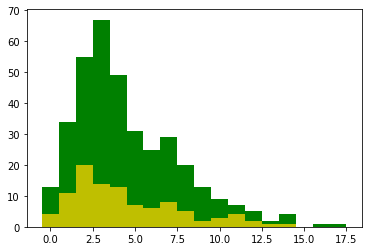

Bowler's Economy  :  4.5698630136986305
Bowlership's Economy  :  4.5049504950495045


Bowler's Skew     :  1.0482087871992898
Bowlership's Skew :  1.0204595899567686
Bowler's Kurtosis     :  1.0009311690709097
Bowlership's Kurtosis :  0.16005496550583276


Greater : Statistics=183.50, p=0.02 
Two-Sided : Statistics=183.50, p=0.04 
Less : Statistics=183.50, p=0.98 

Mohammad Nabi - Rashid Khan better than Mohammad Nabi
____________________________________________


Mohammed Shami B Kumar


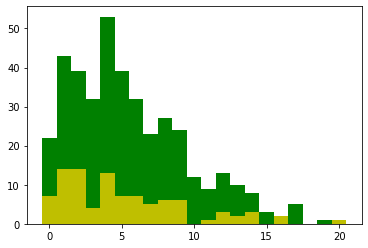

Bowler's Economy  :  5.5954773869346734
Bowlership's Economy  :  5.126315789473685


Bowler's Skew     :  0.8533589750554313
Bowlership's Skew :  0.8170282152378864
Bowler's Kurtosis     :  0.3152030455117676
Bowlership's Kurtosis :  -0.48224624901627333


Greater : Statistics=243.00, p=0.00 
Two-Sided : Statistics=243.00, p=0.01 
Less : Statistics=243.00, p=1.00 

Mohammed Shami - B Kumar better than Mohammed Shami
____________________________________________


NLTC Perera AD Mathews


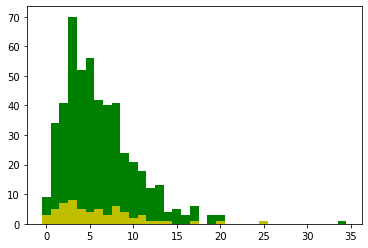

Bowler's Economy  :  6.148296593186373
Bowlership's Economy  :  6.098360655737705


Bowler's Skew     :  1.5080464671576181
Bowlership's Skew :  0.4832615627582119
Bowler's Kurtosis     :  4.496876131486112
Bowlership's Kurtosis :  -0.8519953279882442


Greater : Statistics=323.50, p=0.00 
Two-Sided : Statistics=323.50, p=0.00 
Less : Statistics=323.50, p=1.00 

NLTC Perera - AD Mathews better than NLTC Perera
____________________________________________


NW Bracken B Lee


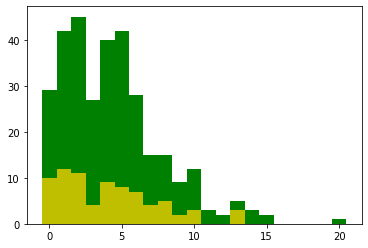

Bowler's Economy  :  4.346875
Bowlership's Economy  :  4.089743589743589


Bowler's Skew     :  1.091423994308594
Bowlership's Skew :  0.24952119118614222
Bowler's Kurtosis     :  1.4983131568993056
Bowlership's Kurtosis :  -1.382786550900297


Greater : Statistics=138.50, p=0.06 
Two-Sided : Statistics=138.50, p=0.11 
Less : Statistics=138.50, p=0.95 

____________________________________________


P Kumar A Nehra


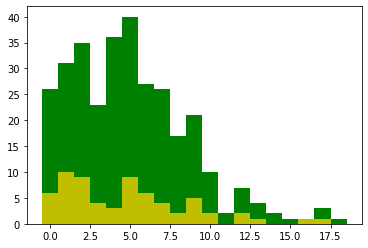

Bowler's Economy  :  5.012779552715655
Bowlership's Economy  :  4.8


Bowler's Skew     :  0.8570221080315834
Bowlership's Skew :  0.611564591846193
Bowler's Kurtosis     :  0.7825137868221321
Bowlership's Kurtosis :  -0.92625


Greater : Statistics=204.50, p=0.02 
Two-Sided : Statistics=204.50, p=0.03 
Less : Statistics=204.50, p=0.99 

P Kumar - A Nehra better than P Kumar
____________________________________________


P Utseya RW Price


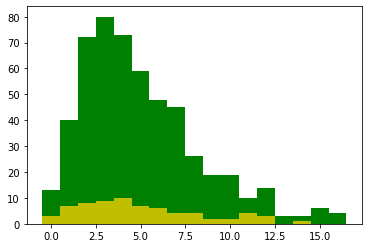

Bowler's Economy  :  5.048689138576779
Bowlership's Economy  :  5.042857142857143


Bowler's Skew     :  0.9922381086957845
Bowlership's Skew :  0.33867663955631205
Bowler's Kurtosis     :  0.7717313679210203
Bowlership's Kurtosis :  -1.1257396449704142


Greater : Statistics=204.50, p=0.00 
Two-Sided : Statistics=204.50, p=0.00 
Less : Statistics=204.50, p=1.00 

P Utseya - RW Price better than P Utseya
____________________________________________


R Ashwin RA Jadeja


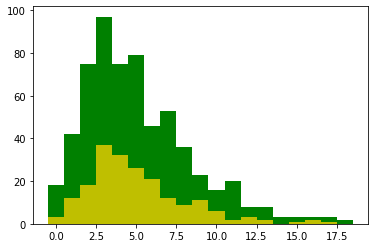

Bowler's Economy  :  5.118032786885246
Bowlership's Economy  :  5.08080808080808


Bowler's Skew     :  1.0585490848505208
Bowlership's Skew :  0.9590612539957731
Bowler's Kurtosis     :  1.2013570416887562
Bowlership's Kurtosis :  -0.26335649520013993


Greater : Statistics=230.00, p=0.02 
Two-Sided : Statistics=230.00, p=0.03 
Less : Statistics=230.00, p=0.99 

R Ashwin - RA Jadeja better than R Ashwin
____________________________________________


RA Jadeja R Ashwin


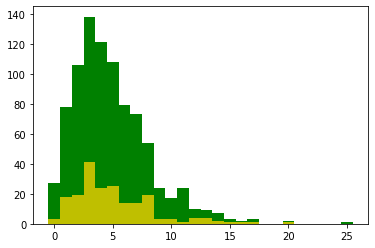

Bowler's Economy  :  4.8792325056433405
Bowlership's Economy  :  5.040404040404041


Bowler's Skew     :  1.3034345114299661
Bowlership's Skew :  1.1454164479265045
Bowler's Kurtosis     :  2.954532619486285
Bowlership's Kurtosis :  0.603557597965922


Greater : Statistics=277.50, p=0.01 
Two-Sided : Statistics=277.50, p=0.01 
Less : Statistics=277.50, p=0.99 

____________________________________________


RA Jadeja Kuldeep Yadav


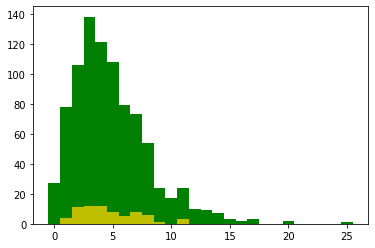

Bowler's Economy  :  4.8792325056433405
Bowlership's Economy  :  4.6571428571428575


Bowler's Skew     :  1.3034345114299661
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.954532619486285
Bowlership's Kurtosis :  -1.2412564045444419


Greater : Statistics=144.50, p=0.03 
Two-Sided : Statistics=144.50, p=0.05 
Less : Statistics=144.50, p=0.98 

____________________________________________


Rubel Hossain Shakib Al Hasan


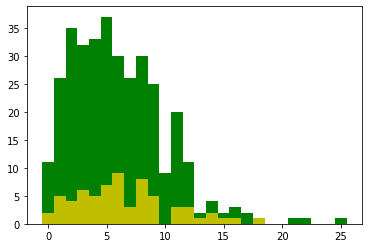

Bowler's Economy  :  6.017543859649122
Bowlership's Economy  :  6.5


Bowler's Skew     :  1.0369806743245968
Bowlership's Skew :  0.5330417881438286
Bowler's Kurtosis     :  1.8681854626755605
Bowlership's Kurtosis :  -0.7963772810711593


Greater : Statistics=260.50, p=0.02 
Two-Sided : Statistics=260.50, p=0.04 
Less : Statistics=260.50, p=0.98 

____________________________________________


SC Williams Sikandar Raza


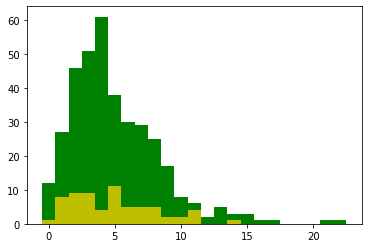

Bowler's Economy  :  5.013623978201635
Bowlership's Economy  :  4.924242424242424


Bowler's Skew     :  1.3671630346962496
Bowlership's Skew :  0.3872985840530147
Bowler's Kurtosis     :  3.0600172862426893
Bowlership's Kurtosis :  -1.0352441601494629


Greater : Statistics=171.00, p=0.07 
Two-Sided : Statistics=171.00, p=0.13 
Less : Statistics=171.00, p=0.94 

____________________________________________


SCJ Broad TT Bresnan


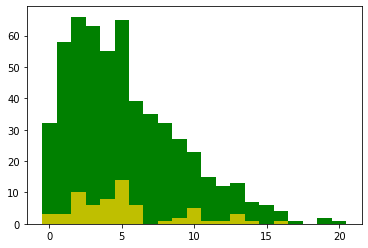

Bowler's Economy  :  5.282374100719425
Bowlership's Economy  :  5.338461538461538


Bowler's Skew     :  0.9019105135445932
Bowlership's Skew :  1.183887959634499
Bowler's Kurtosis     :  0.4610234435325249
Bowlership's Kurtosis :  0.5653902417179988


Greater : Statistics=250.50, p=0.00 
Two-Sided : Statistics=250.50, p=0.00 
Less : Statistics=250.50, p=1.00 

____________________________________________


SCJ Broad JM Anderson


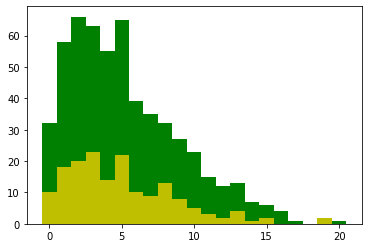

Bowler's Economy  :  5.282374100719425
Bowlership's Economy  :  5.018072289156627


Bowler's Skew     :  0.9019105135445932
Bowlership's Skew :  0.49736930598193846
Bowler's Kurtosis     :  0.4610234435325249
Bowlership's Kurtosis :  -1.0722420416006797


Greater : Statistics=245.00, p=0.01 
Two-Sided : Statistics=245.00, p=0.02 
Less : Statistics=245.00, p=0.99 

SCJ Broad - JM Anderson better than SCJ Broad
____________________________________________


SL Malinga KMDN Kulasekara


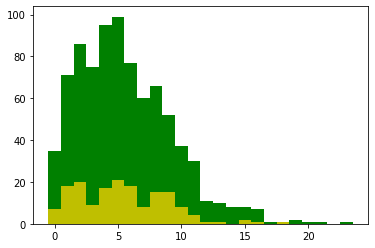

Bowler's Economy  :  5.592326139088729
Bowlership's Economy  :  5.36144578313253


Bowler's Skew     :  0.8940060275882517
Bowlership's Skew :  0.1380829741694612
Bowler's Kurtosis     :  1.0967644484907204
Bowlership's Kurtosis :  -1.5208459376858148


Greater : Statistics=261.00, p=0.04 
Two-Sided : Statistics=261.00, p=0.07 
Less : Statistics=261.00, p=0.97 

____________________________________________


SM Pollock M Ntini


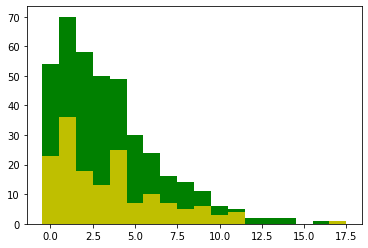

Bowler's Economy  :  3.481012658227848
Bowlership's Economy  :  3.4177215189873418


Bowler's Skew     :  1.261726544471384
Bowlership's Skew :  1.035137455288984
Bowler's Kurtosis     :  1.8034264749816575
Bowlership's Kurtosis :  0.025592664359860517


Greater : Statistics=126.00, p=0.26 
Two-Sided : Statistics=126.00, p=0.53 
Less : Statistics=126.00, p=0.75 

____________________________________________


SR Watson MG Johnson


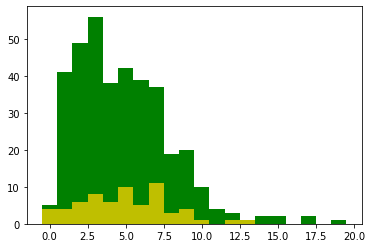

Bowler's Economy  :  4.846361185983827
Bowlership's Economy  :  4.9375


Bowler's Skew     :  1.072245856324442
Bowlership's Skew :  0.49496207536344033
Bowler's Kurtosis     :  1.8107673444394354
Bowlership's Kurtosis :  -0.7026181818181811


Greater : Statistics=157.00, p=0.06 
Two-Sided : Statistics=157.00, p=0.11 
Less : Statistics=157.00, p=0.95 

____________________________________________


ST Finn JM Anderson


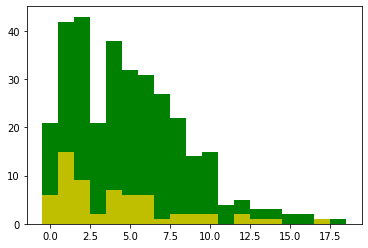

Bowler's Economy  :  4.9296636085626915
Bowlership's Economy  :  4.158730158730159


Bowler's Skew     :  0.8386782733434729
Bowlership's Skew :  1.430986403523176
Bowler's Kurtosis     :  0.5656467065428386
Bowlership's Kurtosis :  1.4777767713886432


Greater : Statistics=216.50, p=0.01 
Two-Sided : Statistics=216.50, p=0.01 
Less : Statistics=216.50, p=1.00 

ST Finn - JM Anderson better than ST Finn
____________________________________________


Saeed Ajmal Shahid Afridi


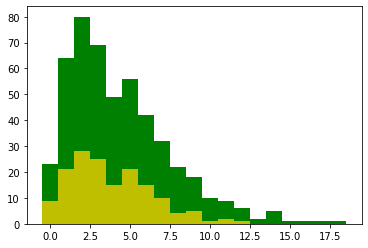

Bowler's Economy  :  4.3869653767820775
Bowlership's Economy  :  3.8089171974522293


Bowler's Skew     :  1.1044955245646084
Bowlership's Skew :  0.30833339550965305
Bowler's Kurtosis     :  1.3311762432538705
Bowlership's Kurtosis :  -1.280154404466292


Greater : Statistics=150.00, p=0.16 
Two-Sided : Statistics=150.00, p=0.32 
Less : Statistics=150.00, p=0.85 

____________________________________________


Saeed Ajmal Mohammad Hafeez


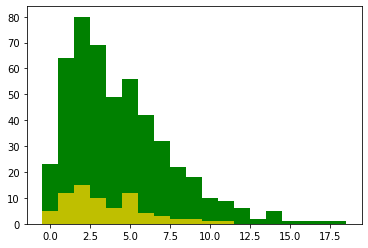

Bowler's Economy  :  4.3869653767820775
Bowlership's Economy  :  3.506849315068493


Bowler's Skew     :  1.1044955245646084
Bowlership's Skew :  0.5983362444828538
Bowler's Kurtosis     :  1.3311762432538705
Bowlership's Kurtosis :  -1.1174850765002828


Greater : Statistics=157.50, p=0.04 
Two-Sided : Statistics=157.50, p=0.08 
Less : Statistics=157.50, p=0.96 

____________________________________________


Shahid Afridi Mohammad Hafeez


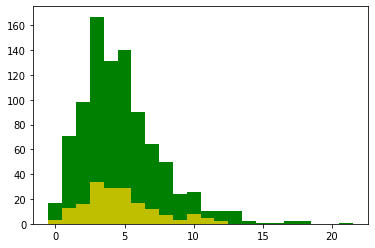

Bowler's Economy  :  4.761177753544166
Bowlership's Economy  :  4.696629213483146


Bowler's Skew     :  1.2361356226068603
Bowlership's Skew :  0.7022177640683612
Bowler's Kurtosis     :  2.6281652438843404
Bowlership's Kurtosis :  -0.8452201300192028


Greater : Statistics=153.00, p=0.20 
Two-Sided : Statistics=153.00, p=0.41 
Less : Statistics=153.00, p=0.81 

____________________________________________


Shahid Afridi Saeed Ajmal


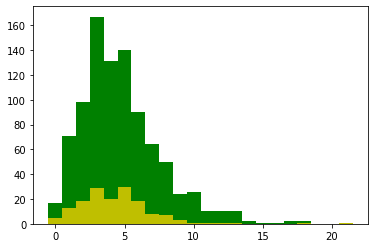

Bowler's Economy  :  4.761177753544166
Bowlership's Economy  :  4.445859872611465


Bowler's Skew     :  1.2361356226068603
Bowlership's Skew :  0.8301815281150883
Bowler's Kurtosis     :  2.6281652438843404
Bowlership's Kurtosis :  -0.6616445241711721


Greater : Statistics=224.00, p=0.02 
Two-Sided : Statistics=224.00, p=0.04 
Less : Statistics=224.00, p=0.98 

Shahid Afridi - Saeed Ajmal better than Shahid Afridi
____________________________________________


Shahid Afridi Shoaib Malik


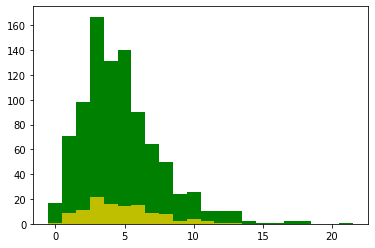

Bowler's Economy  :  4.761177753544166
Bowlership's Economy  :  4.808695652173913


Bowler's Skew     :  1.2361356226068603
Bowlership's Skew :  0.5058797479230832
Bowler's Kurtosis     :  2.6281652438843404
Bowlership's Kurtosis :  -0.8100283376317385


Greater : Statistics=196.50, p=0.02 
Two-Sided : Statistics=196.50, p=0.05 
Less : Statistics=196.50, p=0.98 

____________________________________________


Shakib Al Hasan Mahmudullah


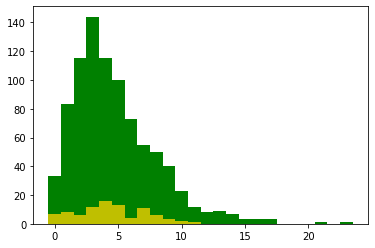

Bowler's Economy  :  4.725512528473804
Bowlership's Economy  :  4.404494382022472


Bowler's Skew     :  1.2462729816667057
Bowlership's Skew :  0.3560770843974681
Bowler's Kurtosis     :  2.403969495443964
Bowlership's Kurtosis :  -0.98209307756062


Greater : Statistics=172.00, p=0.02 
Two-Sided : Statistics=172.00, p=0.04 
Less : Statistics=172.00, p=0.98 

Shakib Al Hasan - Mahmudullah better than Shakib Al Hasan
____________________________________________


Shakib Al Hasan Rubel Hossain


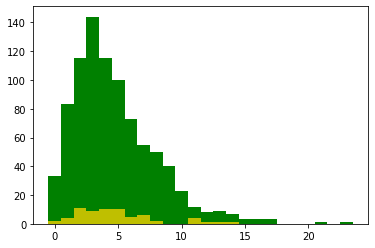

Bowler's Economy  :  4.725512528473804
Bowlership's Economy  :  4.757575757575758


Bowler's Skew     :  1.2462729816667057
Bowlership's Skew :  0.39296989804516225
Bowler's Kurtosis     :  2.403969495443964
Bowlership's Kurtosis :  -1.3740408694334778


Greater : Statistics=201.50, p=0.00 
Two-Sided : Statistics=201.50, p=0.01 
Less : Statistics=201.50, p=1.00 

____________________________________________


Shakib Al Hasan Mashrafe Mortaza


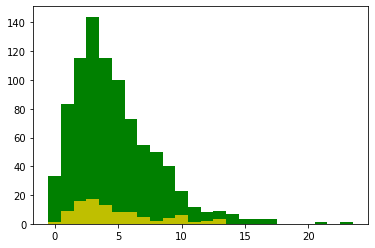

Bowler's Economy  :  4.725512528473804
Bowlership's Economy  :  4.768421052631579


Bowler's Skew     :  1.2462729816667057
Bowlership's Skew :  0.7303340606144949
Bowler's Kurtosis     :  2.403969495443964
Bowlership's Kurtosis :  -0.684404054291234


Greater : Statistics=208.00, p=0.01 
Two-Sided : Statistics=208.00, p=0.02 
Less : Statistics=208.00, p=0.99 

____________________________________________


Shakib Al Hasan Abdur Razzak


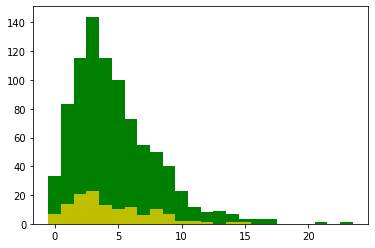

Bowler's Economy  :  4.725512528473804
Bowlership's Economy  :  4.361538461538461


Bowler's Skew     :  1.2462729816667057
Bowlership's Skew :  0.6568126730417695
Bowler's Kurtosis     :  2.403969495443964
Bowlership's Kurtosis :  -0.500859141078279


Greater : Statistics=216.00, p=0.01 
Two-Sided : Statistics=216.00, p=0.03 
Less : Statistics=216.00, p=0.99 

Shakib Al Hasan - Abdur Razzak better than Shakib Al Hasan
____________________________________________


Shoaib Malik Shahid Afridi


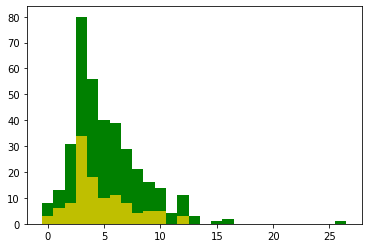

Bowler's Economy  :  5.1924119241192415
Bowlership's Economy  :  4.6173913043478265


Bowler's Skew     :  1.4963429271742918
Bowlership's Skew :  1.990816714388917
Bowler's Kurtosis     :  5.022077816548178
Bowlership's Kurtosis :  3.1271497652323026


Greater : Statistics=131.00, p=0.10 
Two-Sided : Statistics=131.00, p=0.21 
Less : Statistics=131.00, p=0.90 

____________________________________________


TA Boult TG Southee


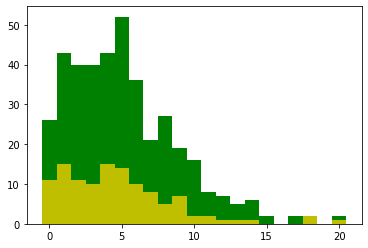

Bowler's Economy  :  5.153652392947103
Bowlership's Economy  :  4.767241379310345


Bowler's Skew     :  1.0146508223638266
Bowlership's Skew :  0.23355313289257898
Bowler's Kurtosis     :  1.2121853655517087
Bowlership's Kurtosis :  -1.4383358475588799


Greater : Statistics=242.50, p=0.01 
Two-Sided : Statistics=242.50, p=0.01 
Less : Statistics=242.50, p=1.00 

TA Boult - TG Southee better than TA Boult
____________________________________________


TA Boult MJ Henry


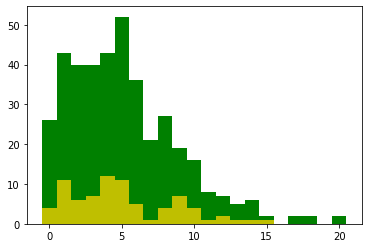

Bowler's Economy  :  5.153652392947103
Bowlership's Economy  :  5.076923076923077


Bowler's Skew     :  1.0146508223638266
Bowlership's Skew :  0.6361784145397347
Bowler's Kurtosis     :  1.2121853655517087
Bowlership's Kurtosis :  -0.8421353662892157


Greater : Statistics=243.00, p=0.00 
Two-Sided : Statistics=243.00, p=0.00 
Less : Statistics=243.00, p=1.00 

TA Boult - MJ Henry better than TA Boult
____________________________________________


TG Southee TA Boult


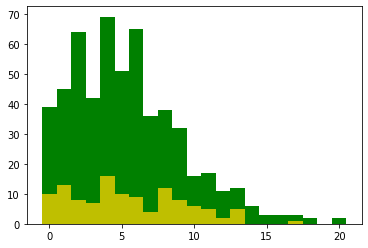

Bowler's Economy  :  5.401079136690647
Bowlership's Economy  :  5.474137931034483


Bowler's Skew     :  0.8608239737939603
Bowlership's Skew :  0.23557480343819676
Bowler's Kurtosis     :  0.6991932615457377
Bowlership's Kurtosis :  -0.5210505714708242


Greater : Statistics=218.50, p=0.01 
Two-Sided : Statistics=218.50, p=0.02 
Less : Statistics=218.50, p=0.99 

____________________________________________


TG Southee KD Mills


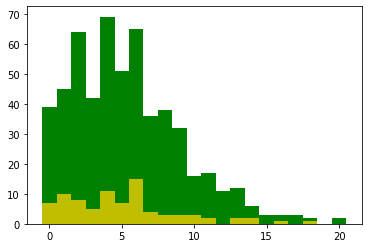

Bowler's Economy  :  5.401079136690647
Bowlership's Economy  :  5.107142857142857


Bowler's Skew     :  0.8608239737939603
Bowlership's Skew :  0.9803637803294333
Bowler's Kurtosis     :  0.6991932615457377
Bowlership's Kurtosis :  0.04035418783568012


Greater : Statistics=258.00, p=0.00 
Two-Sided : Statistics=258.00, p=0.00 
Less : Statistics=258.00, p=1.00 

TG Southee - KD Mills better than TG Southee
____________________________________________


TL Chatara T Panyangara


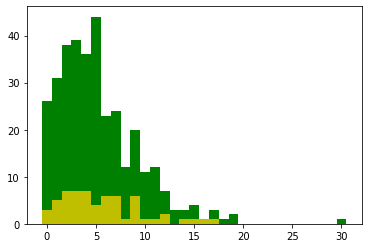

Bowler's Economy  :  5.249266862170088
Bowlership's Economy  :  5.583333333333333


Bowler's Skew     :  1.4421231637601388
Bowlership's Skew :  0.22055815720008712
Bowler's Kurtosis     :  3.8393225405911515
Bowlership's Kurtosis :  -1.679704100403059


Greater : Statistics=272.50, p=0.00 
Two-Sided : Statistics=272.50, p=0.01 
Less : Statistics=272.50, p=1.00 

____________________________________________


TT Bresnan SCJ Broad


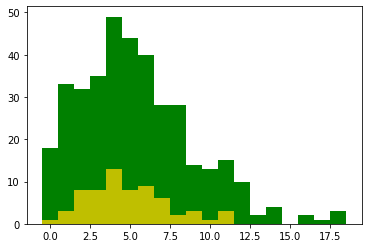

Bowler's Economy  :  5.401617250673854
Bowlership's Economy  :  4.876923076923077


Bowler's Skew     :  0.8225686522426688
Bowlership's Skew :  0.4832776192609749
Bowler's Kurtosis     :  0.7269428277111869
Bowlership's Kurtosis :  -0.8117379488644634


Greater : Statistics=171.00, p=0.00 
Two-Sided : Statistics=171.00, p=0.01 
Less : Statistics=171.00, p=1.00 

TT Bresnan - SCJ Broad better than TT Bresnan
____________________________________________


TT Bresnan JM Anderson


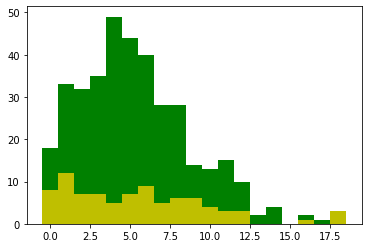

Bowler's Economy  :  5.401617250673854
Bowlership's Economy  :  5.488372093023256


Bowler's Skew     :  0.8225686522426688
Bowlership's Skew :  0.42727719040327955
Bowler's Kurtosis     :  0.7269428277111869
Bowlership's Kurtosis :  -0.0051259271688368635


Greater : Statistics=203.50, p=0.01 
Two-Sided : Statistics=203.50, p=0.01 
Less : Statistics=203.50, p=0.99 

____________________________________________


Yuvraj Singh Harbhajan Singh


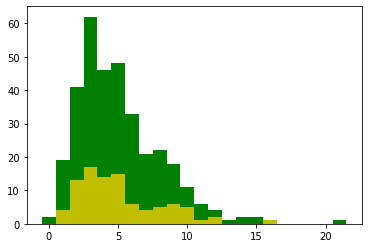

Bowler's Economy  :  5.076470588235294
Bowlership's Economy  :  5.064516129032258


Bowler's Skew     :  1.2300690327777062
Bowlership's Skew :  0.633615888680778
Bowler's Kurtosis     :  2.463987260055733
Bowlership's Kurtosis :  -1.1035454668874336


Greater : Statistics=148.50, p=0.11 
Two-Sided : Statistics=148.50, p=0.21 
Less : Statistics=148.50, p=0.90 

____________________________________________


Z Khan MM Patel


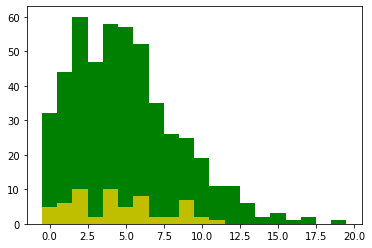

Bowler's Economy  :  5.030487804878049
Bowlership's Economy  :  4.483333333333333


Bowler's Skew     :  0.8066359385129929
Bowlership's Skew :  0.3160883507883844
Bowler's Kurtosis     :  0.5639063004041573
Bowlership's Kurtosis :  -1.280618311533888


Greater : Statistics=175.50, p=0.01 
Two-Sided : Statistics=175.50, p=0.01 
Less : Statistics=175.50, p=0.99 

Z Khan - MM Patel better than Z Khan
____________________________________________




In [9]:

from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

#with open("econ-edges.csv",'w') as fw:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        print(name,pname)
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())
        plt.bar(*zip(*pure_dict.items()),color='g',width=1.0)
        plt.bar(*zip(*fin_dict.items()),color='y',width=1.0)

        plt.show()

        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d
        print("Bowler's Economy  : ",be)
        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 
        print("Bowlership's Economy  : ",bse)
        print('\n')

        print("Bowler's Skew     : ",skew(dfbowler['runs'].dropna()))
        print("Bowlership's Skew : ",skew((fin_df[1].dropna())))

        print("Bowler's Kurtosis     : ",kurtosis(dfbowler['runs'].dropna()))
        print("Bowlership's Kurtosis : ",kurtosis((fin_df[1].dropna())))

        print('\n')

        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        print('Greater : Statistics=%.2f, p=%.2f ' % (stat1, p_value1)) 

        #if p_value1 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT GREATER than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 GREATER THAN EQUAL TO batch2')

        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        print('Two-Sided : Statistics=%.2f, p=%.2f ' % (stat2, p_value2)) 

        #if p_value2 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT EQUAL to batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 is EQUAL to batch2')

        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        print('Less : Statistics=%.2f, p=%.2f \n' % (stat3, p_value3)) 

        #if p_value3 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT LESS than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 LESS THAN EQUAL TO batch2')

        if (p_value1 < alpha) and (p_value2 < alpha) and (be > bse):
            print(name,"-",pname,"better than",name)
            #fw.write(name+','+pname+'\n')
            
        if (p_value3 < alpha) and (p_value2 < alpha):
            print(name,"-",pname, "worse than",name)

        print('____________________________________________\n\n')
#fw.close()      
#print(fin_dict)
#print(fin_df)

In [5]:
import networkx as nx

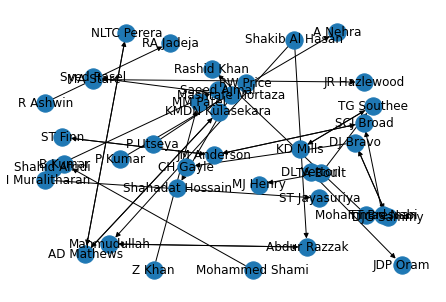

In [6]:
G = nx.read_edgelist('ODI-econ-edges.csv',create_using=nx.DiGraph(), delimiter=",")
nx.draw_random(G,with_labels=True)
plt.show()

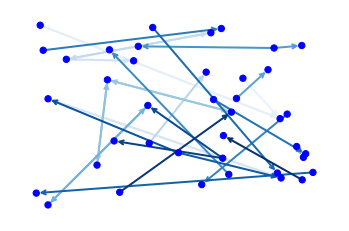

In [19]:
G = nx.read_edgelist('ODI-econ-edges.csv',create_using=nx.DiGraph(), delimiter=",")
pos = nx.random_layout(G)

node_sizes = [40 for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue")

edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Blues,
    width=2,
)

ax = plt.gca()
ax.set_axis_off()
plt.show()